In [1]:
import pygplates
import pandas as pd
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

print pygplates.__version__

from GPlatesReconstructionModel import ReconstructionModel, SubductionConvergence


2.1.0.19


In [2]:
# Build an object describing a reconstruction model

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_static_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz')


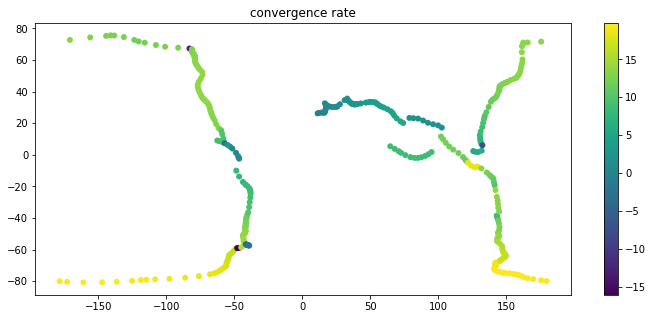

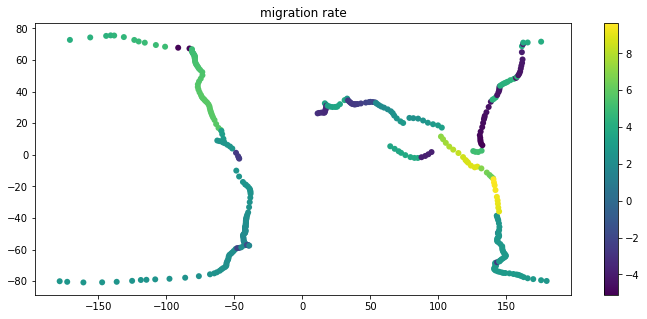

In [3]:
# compute the subduction zone kinematics for a single time snapshot
# results are returned in a 'SubductionConvergence' class object

subduction_kinematics_120Ma = SubductionConvergence(M2016,120.,threshold_sampling_distance_radians=5.)

subduction_kinematics_120Ma.plot('cr')
subduction_kinematics_120Ma.plot('mr')



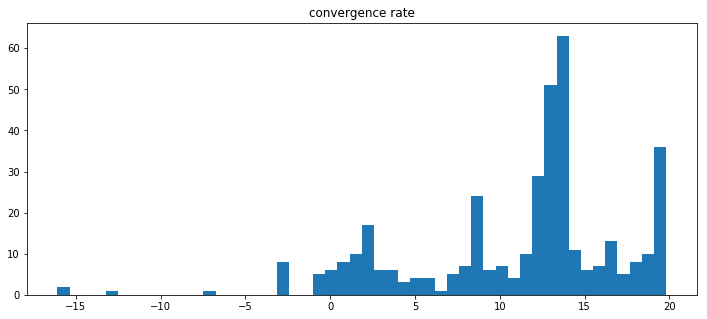

In [4]:
subduction_kinematics_120Ma.hist('cr')

In [5]:
subduction_kinematics = SubductionConvergence(M2016,np.arange(0,201,10),threshold_sampling_distance_radians=5.)


/Users/Simon/GIT/PlateTectonicTools/ptt/subduction_convergence.py:283: RuntimeWarning: Unable to find the overriding and subducting plates of the subducting sub-segment "Shirshov Ridge Subduction" at 0Ma.
    Either the subduction polarity is not properly set or there are not exactly 2 topologies sharing the sub-segment.
    Ignoring current sub-segment.
  RuntimeWarning)
/Users/Simon/GIT/PlateTectonicTools/ptt/subduction_convergence.py:283: RuntimeWarning: Unable to find the overriding and subducting plates of the subducting sub-segment "Sandwich Trench" at 0Ma.
    Either the subduction polarity is not properly set or there are not exactly 2 topologies sharing the sub-segment.
    Ignoring current sub-segment.
  RuntimeWarning)
/Users/Simon/GIT/PlateTectonicTools/ptt/subduction_convergence.py:283: RuntimeWarning: Unable to find the overriding and subducting plates of the subducting sub-segment "Tonga-Kermadec-MG" at 0Ma.
    Either the subduction polarity is not properly set or there

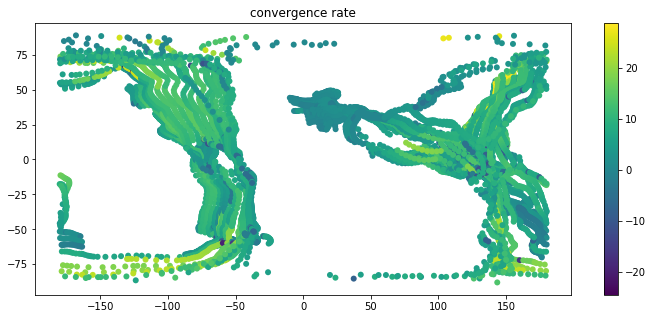

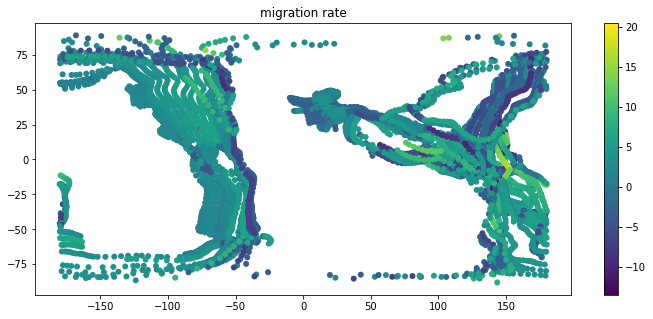

In [6]:
subduction_kinematics.plot('cr')
subduction_kinematics.plot('mr')



In [7]:

mr = np.asarray(subduction_kinematics.df['migr_rate'])
mo = np.asarray(subduction_kinematics.df['migr_obliq'])
subduction_kinematics.df['ortho_migr_rate'] = pd.Series(mr*np.sin(np.radians(np.abs(mo))), index=subduction_kinematics.df.index)

cr = np.asarray(subduction_kinematics.df['conv_rate'])
co = np.asarray(subduction_kinematics.df['conv_obliq'])
subduction_kinematics.df['ortho_conv_rate'] = pd.Series(cr*np.abs(np.cos(np.radians(co))), index=subduction_kinematics.df.index)



In [8]:
subduction_kinematics.df.head()

,lon,lat,conv_rate,conv_obliq,migr_rate,migr_obliq,arc_length,arc_azimuth,subducting_plate,overriding_plate,time,ortho_migr_rate,ortho_conv_rate
0,-179.373795,-11.321178,17.081339,68.982777,10.327195,-134.407560,1.016692,196.319209,901,821,0,7.377545,6.126198
1,-178.352226,-11.842482,16.802632,50.235851,9.912845,-153.039844,1.275456,216.396194,901,821,0,4.494194,10.747448
2,-177.749312,-32.016022,5.748449,-26.679372,-4.610512,56.324450,7.853311,286.129015,901,806,0,-3.836825,5.136429
3,-177.175259,-12.710949,16.365071,50.650544,9.332430,-152.684862,1.606997,217.555986,901,821,0,4.282506,10.376250
4,-176.323698,-26.874407,9.155036,-7.990859,4.037190,109.560561,1.901822,276.936919,901,821,0,3.804197,9.066143
